# Partie 1 : Feature selection

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

In [7]:

###############################################################################
# On utilise des données simple : les iris

iris = datasets.load_iris()

# On ajoute des colonnes (ou attributs ou features) qui ne sont que du bruit
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target

print X.shape

###############################################################################
# On initialise un plot dont l'abscisse sera le numéro de feature

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

(150, 24)


<Container object of 24 artists>

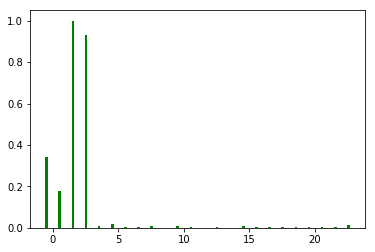

In [8]:
###############################################################################
# Sélection de feature univariée : indépendante pour chaque feature
# On garde les 10% features les plus importants
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

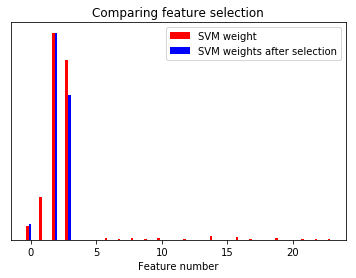

In [9]:
###############################################################################
# ON fait de même avec un SVM linéaire.
# L'importance d'une feature est mesurée par la valeur absolue du paramètres correspondant

clf = svm.SVC(kernel='linear')
              
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

# Méthode alternative : On apprend un SVM sur les features sélectionnés par la méthode univariée

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

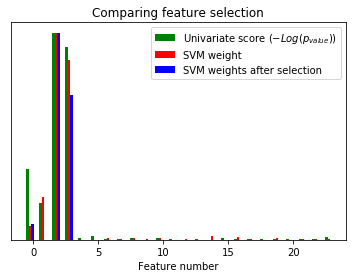

In [10]:
### Les deux ensembles
plt.figure(1)
plt.clf()

###############################################################################
# Méthode univariée

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')



###############################################################################
#  SVM

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

##  1. Que concluez vous sur les deux méthodes de sélection de variables considérées ?

Les résultats sont approximativement les mêmes. Ce n'est pas si étonnant, car les variables sont les mêmes, à un bruit près.

## 2. Autre méthode de sélection avec des SVMs

Utilisez des SVM avec réglarisation L1 (utilisez [svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) et voyez si cela change quelque chose.

Attention les SVM de type linearSVC avec réularisation L1 ne peuvent être appris dans le dual. 

=> il faut utiliser  : clf = svm.LinearSVC(penalty='l1', dual=False)

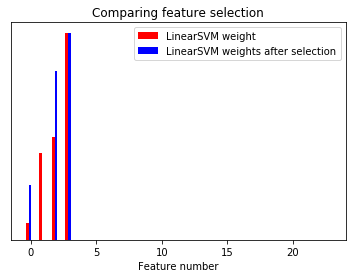

In [44]:
clf = svm.LinearSVC(penalty='l1', dual=False)
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='LinearSVM weight', color='r')

clf_selected = svm.LinearSVC(penalty='l1', dual=False)
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='LinearSVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Partie 2 : Prédiction d'annulation de réservations de taxis avec la régression logistique

La compétition est hébergée par le site kaggle [ici](https://inclass.kaggle.com/c/predicting-cab-booking-cancellations)

La présentation du problème :

The business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore. The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

But de la compétition :

The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually get cancelled due to car unavailability. This is a classification task that includes misclassification costs. The winning entry will be the one with the lowest average-cost-per-booking.

Participants need to upload their classifications (0=no cancellation or 1=cancellation), and the system will compute the average-cost-per-booking based on these classifications.

Les données disponibles sont représentées par les champs suivants :

- id - booking ID
- user_id - the ID of the customer (based on mobile number)
- vehicle_model_id - vehicle model type.
- package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
- travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).
- from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages
- to_area_id - unique identifier of area. Applicable only for point-to-point travel
- from_city_id - unique identifier of city
- to_city_id - unique identifier of city (only for intercity)
- from_date - time stamp of requested trip start
- to_date - time stamp of trip end
- online_booking - if booking was done on desktop website
- mobile_site_booking - if booking was done on mobile website
- booking_created - time stamp of booking
- from_lat - latitude of from area
- from_long - longitude of from area
- to_lat - latitude of to area
- to_long - longitude of to area
- Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car.
- Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units.

In [11]:
import pandas as pd

cars_cancel_train = pd.read_csv('./Datas/Kaggle_YourCabs_training.csv')

In [12]:
# Afficher les premières lignes du frame

cars_cancel_train.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [13]:
# On affiche les dscriptions des colonnes puis leurs types

cars_cancel_train.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


In [14]:
cars_cancel_train.dtypes

id                       int64
user_id                  int64
vehicle_model_id         int64
package_id             float64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
from_city_id           float64
to_city_id             float64
from_date               object
to_date                float64
online_booking           int64
mobile_site_booking      int64
booking_created         object
from_lat               float64
from_long              float64
to_lat                 float64
to_long                float64
Car_Cancellation         int64
Cost_of_error          float64
dtype: object

Il faut convertir les informations de date en firmat date-time pour pouvoir les exploiter ensuite. 

[La gestion des données de type date etc sous pandas](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

In [15]:
# conversion de la colonne from_date en date-time
# Note: NaN est converti en NaT( Not a timestamp )

cars_cancel_train['from_date'] = pd.to_datetime(cars_cancel_train['from_date'])

# idem pour  to_date 
cars_cancel_train['to_date'] = pd.to_datetime(cars_cancel_train['to_date'])

# idem pour booking_created 
cars_cancel_train['booking_created'] = pd.to_datetime(cars_cancel_train['booking_created'])

In [16]:
# reaffichez la description des colonnes et leurs types

cars_cancel_train.describe()
cars_cancel_train.dtypes


id                              int64
user_id                         int64
vehicle_model_id                int64
package_id                    float64
travel_type_id                  int64
from_area_id                  float64
to_area_id                    float64
from_city_id                  float64
to_city_id                    float64
from_date              datetime64[ns]
to_date                datetime64[ns]
online_booking                  int64
mobile_site_booking             int64
booking_created        datetime64[ns]
from_lat                      float64
from_long                     float64
to_lat                        float64
to_long                       float64
Car_Cancellation                int64
Cost_of_error                 float64
dtype: object

In [17]:
# On a besoin de spécifier que le champs 'id' est un index
cars_cancel_train.set_index(['id'], inplace=True)

# Initialisation du graphique

%matplotlib inline

import matplotlib.pyplot as plt



In [18]:
# Compter les nombres d'occurences de chaque valeur possible de  Car_Cancellation et de package_id
count1 = cars_cancel_train['Car_Cancellation'].value_counts()
count2 = cars_cancel_train['package_id'].value_counts()

print count1, count2

0    40299
1     3132
Name: Car_Cancellation, dtype: int64 1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64


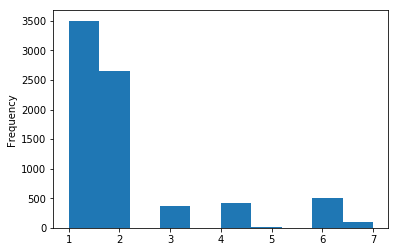

In [21]:
# Ploter un histogramme de la distribution de package_id
cars_cancel_train['package_id'].plot.hist()

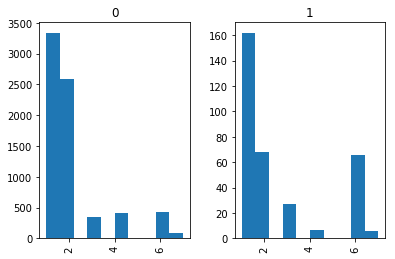

In [22]:
# ON veut étudier si le package est lié à l'annulation

cars_cancel_train.hist(column='package_id', by='Car_Cancellation');


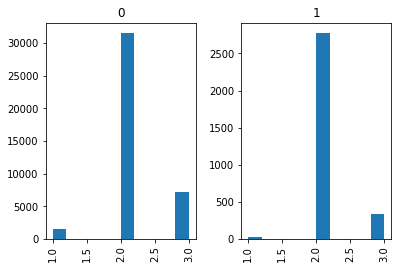

In [23]:
# Idem pour  travel_type
cars_cancel_train.hist(column='travel_type_id', by='Car_Cancellation');

In [24]:
# Parenthèse : Utilisation de groupby size et unstack

import pandas as pd
import numpy as np


df3 = pd.DataFrame(np.random.randn(10, 5),columns=['a', 'b', 'c', 'd', 'e'])
df3['f']=[1 ,1 ,1 ,0 ,0, 0, 0, 0,0 ,0]
df3['g']=['a' ,'b', 'a', 'b', 'a' ,'b', 'a', 'b', 'a' ,'b']
g = df3.groupby(['f', 'g'])
h= g.size()
#print h
#print h.dtypes
h= g.size().unstack()
print h.dtypes

g.size().unstack()
#g.iloc[:1]

g
a    int64
b    int64
dtype: object


g,a,b
f,,
0,3,4
1,2,1


In [25]:
# On va se servir de cette manip pour tester si  from_area_id est corrélé à car_cancellation. 
g = cars_cancel_train.groupby(['from_area_id', 'Car_Cancellation']).size().unstack(1)
# NB vous pouvez essayer aussi avec  g = cars_cancel_train.groupby(['from_area_id', 'Car_Cancellation']).size().unstack(0)

In [26]:
g.head()

Car_Cancellation,0,1
from_area_id,,
2.0,27.0,4.0
6.0,7.0,NaN
15.0,6.0,NaN
16.0,5.0,NaN
17.0,2.0,NaN


In [27]:
g['percent_cancelled'] = (g[1] / (g[1] + g[0])) * 100.

In [28]:
g.percent_cancelled.sort_values(ascending=False).iloc[:20]

from_area_id
130.0     80.000000
1148.0    66.666667
1174.0    66.666667
630.0     66.666667
176.0     52.830189
1381.0    50.000000
1160.0    50.000000
1100.0    50.000000
1385.0    50.000000
1276.0    45.454545
211.0     44.444444
1372.0    40.000000
356.0     40.000000
987.0     40.000000
626.0     34.375000
1258.0    33.333333
34.0      33.333333
326.0     33.333333
177.0     33.333333
833.0     33.333333
Name: percent_cancelled, dtype: float64

Que pensez vous des résultats obtenus ?

Il existe effectivemment une vraie disparité des annulations, et il existe des régions pour lesquelles on peut vraiment inférer une annulation avec forte probabilité (80% d'annulations enregistré sur la région d'id 130).

In [38]:
# Faites de même pour to_area_id

In [39]:
to = cars_cancel_train.groupby(['to_area_id', 'Car_Cancellation']).size().unstack(1)
to.dtypes

Car_Cancellation
0    float64
1    float64
dtype: object

In [40]:
to.head()

Car_Cancellation,0,1
to_area_id,,
2.0,4.0,NaN
6.0,2.0,NaN
15.0,3.0,2.0
16.0,3.0,1.0
17.0,1.0,NaN


In [41]:
to['percent_cancelled'] = (to[1] / (to[1] + to[0])) * 100
#to.percent_cancelled.order(ascending=False).iloc[:20]
to.percent_cancelled.sort_values(ascending=False).head()


to_area_id
1247.0    75.000000
677.0     66.666667
355.0     66.666667
1218.0    60.000000
845.0     60.000000
Name: percent_cancelled, dtype: float64

On fait maintenant la même chose mais en étudiant les paires from_area_id et to_area_id

In [42]:
from_to = cars_cancel_train.groupby(['from_area_id', 'to_area_id', 'Car_Cancellation']).size()
f_t = from_to.unstack(2)
f_t.head()
f_t['percent_cancelled'] = (f_t[1] / (f_t[0] + f_t[1])) * 100.
#f_t.percent_cancelled.order(ascending=False).iloc[:20]
f_t.percent_cancelled.sort_values(ascending=False)[:20]


from_area_id  to_area_id
626.0         122.0         90.909091
1349.0        1052.0        83.333333
1330.0        176.0         80.000000
1052.0        1349.0        78.571429
625.0         452.0         75.000000
1296.0        793.0         75.000000
1365.0        293.0         75.000000
1285.0        61.0          70.588235
122.0         626.0         70.000000
176.0         136.0         66.666667
1068.0        352.0         66.666667
264.0         585.0         66.666667
1384.0        160.0         66.666667
839.0         585.0         66.666667
571.0         396.0         66.666667
83.0          176.0         66.666667
1095.0        25.0          66.666667
363.0         1068.0        66.666667
542.0         1237.0        66.666667
541.0         83.0          66.666667
Name: percent_cancelled, dtype: float64

In [43]:
# Pour terminer on veut étudier si le fait d'aviur réservé online ou par mobile est lié à l'annulation 

import numpy as np

# On utilise pivot qui permet de remettre en forme une frame  

pd.pivot_table(cars_cancel_train[['online_booking', 'mobile_site_booking', 'Car_Cancellation']]
              , values='Car_Cancellation', index=['online_booking', 'mobile_site_booking'], aggfunc= np.count_nonzero)

Car_Cancellation
online_booking mobile_site_booking                  
0              0                                 940
               1                                 289
1              0                                1903

In [44]:
booking_diff = cars_cancel_train[['from_date', 'to_date', 'booking_created', 'Car_Cancellation']]

In [45]:
# On créé une colonne qui mesure la différence entre booking et jour de la course
s2 = booking_diff.loc[:, ('from_date')]
s1 = booking_diff.loc[:, ('booking_created')]
booking_diff.loc[:, 'difference'] = s2 - s1

In [46]:
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference
id,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00


In [47]:
def convert_to_days(x):
    
    seconds = x.total_seconds()
    days = seconds / ( 24. * 60 * 60 )
    return days

booking_diff.loc[:, 'diff_in_days'] = booking_diff.difference.map(convert_to_days)

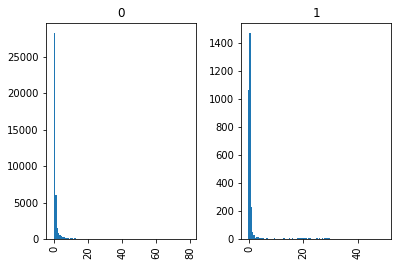

In [48]:
# On affiche les histogrammes correspondants aux deux cas : annulation ou pas d'annulation

booking_diff.head()
booking_diff.hist(column='diff_in_days', by='Car_Cancellation', bins=100);

# Préparation des données

Par la suite on va utiliserles caractéristiques suivantes :

- vehicle_model_id
- package_id
- travel_type_id
- from_area_id
- to_area_id
- from_city_id
- to_city_id
- days_before_booking
- online_booking
- mobile_site_booking
- from_month
- from_weekday
- booking_month
- booking_weekday

Certaines de ces colonnes ont des valeurs manquantes

In [49]:
cars_cancel_train.columns

Index([u'user_id', u'vehicle_model_id', u'package_id', u'travel_type_id',
       u'from_area_id', u'to_area_id', u'from_city_id', u'to_city_id',
       u'from_date', u'to_date', u'online_booking', u'mobile_site_booking',
       u'booking_created', u'from_lat', u'from_long', u'to_lat', u'to_long',
       u'Car_Cancellation', u'Cost_of_error'],
      dtype='object')

In [50]:
cars_cancel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 132512 to 185941
Data columns (total 19 columns):
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null datetime64[ns]
to_date                25541 non-null datetime64[ns]
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null datetime64[ns]
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-null float64
dtyp

In [51]:
cars_cancel_train.loc[:, 'from_month'] = cars_cancel_train.from_date.dt.month
cars_cancel_train.loc[:, 'from_weekday'] = cars_cancel_train.from_date.dt.weekday

cars_cancel_train.loc[:, 'booking_month'] = cars_cancel_train.booking_created.dt.month
cars_cancel_train.loc[:, 'booking_weekday'] = cars_cancel_train.booking_created.dt.weekday

In [52]:
cars_cancel_train.loc[:, 'days_before_booking'] = booking_diff['diff_in_days']

In [53]:
features_cols = ['vehicle_model_id', 'travel_type_id', 'from_area_id',
                 'to_area_id','from_month', 'from_weekday',
                 'days_before_booking', 'online_booking', 'mobile_site_booking',
                 'booking_month', 'booking_weekday']

In [68]:
features = cars_cancel_train[features_cols]
y = cars_cancel_train.Car_Cancellation

In [69]:
# On remplace par ( -9999 ) les valeurs manquantes
cars_cancel_train.fillna(-9999, inplace = True)
cars_cancel_train

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,...,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,from_month,from_weekday,booking_month,booking_weekday,days_before_booking
id,,,,,,,,,,,,,,,,,,,,,
132512,22177,28,-9999.0,2,83.0,448.0,-9999.0,-9999.0,2013-01-01 02:00:00,1969-12-31 23:59:59.999990001,...,77.672290,12.927320,77.635750,0,1.0,1,1,1,1,0.014583
132513,21413,12,-9999.0,2,1010.0,540.0,-9999.0,-9999.0,2013-01-01 09:00:00,1969-12-31 23:59:59.999990001,...,77.749350,12.927680,77.626640,0,1.0,1,1,1,1,0.274306
132514,22178,12,-9999.0,2,1301.0,1034.0,-9999.0,-9999.0,2013-01-01 03:30:00,1969-12-31 23:59:59.999990001,...,77.626915,13.047926,77.597766,0,1.0,1,1,1,1,0.015278
132515,13034,12,-9999.0,2,768.0,398.0,-9999.0,-9999.0,2013-01-01 05:45:00,1969-12-31 23:59:59.999990001,...,77.553320,12.971430,77.639140,0,1.0,1,1,1,1,0.045833
132517,22180,12,-9999.0,2,1365.0,849.0,-9999.0,-9999.0,2013-01-01 09:00:00,1969-12-31 23:59:59.999990001,...,77.677925,12.954340,77.600720,0,1.0,1,1,1,1,0.046528
132518,17712,12,-9999.0,2,1021.0,1323.0,-9999.0,-9999.0,2013-01-01 22:30:00,1969-12-31 23:59:59.999990001,...,77.546250,12.869805,77.653211,0,1.0,1,1,1,1,0.603472
132519,22172,12,-9999.0,1,571.0,-9999.0,15.0,108.0,2013-01-01 09:45:00,1970-01-01 00:00:00.000041275,...,77.696420,-9999.000000,-9999.000000,0,1.0,1,1,1,1,0.016667
132520,22181,12,-9999.0,2,1192.0,832.0,-9999.0,-9999.0,2013-01-01 11:00:00,1969-12-31 23:59:59.999990001,...,77.572700,12.880190,77.645580,0,1.0,1,1,1,1,0.056250
132521,22182,65,2.0,3,448.0,-9999.0,-9999.0,-9999.0,2013-01-01 16:00:00,1969-12-31 23:59:59.999990001,...,77.635750,-9999.000000,-9999.000000,0,1.0,1,1,1,1,0.261111


In [70]:
# on va faire de la sélection de caractéristiques sur une partie de la base de train

from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(y, n_iter=2, test_size=0.3)

In [71]:
train_index, test_index = next(iter(sss))

X_train = features.iloc[train_index]
y_train = y.iloc[train_index]

X_test = features.iloc[test_index]
y_test = y.iloc[test_index]

In [72]:
print 'Shape of training and test dataset %s %s ' %(X_train.shape, X_test.shape)

Shape of training and test dataset (30401, 11) (13030, 11) 


In [73]:
## Take a sample from the training data to do feature selection
sss = StratifiedShuffleSplit(y_train, n_iter=2, test_size=.2)

In [74]:
train_index, test_index = next(iter(sss))

X_train_features = X_train.iloc[test_index]
y_train_features = y_train.iloc[test_index]

X_train_rest = X_train.iloc[train_index]
y_train_rest = y_train.iloc[train_index]


In [75]:
print 'Shape of the training data used for feature selection %s and rest of the dataset %s ' %(X_train_features.shape, X_train_rest.shape)

Shape of the training data used for feature selection (6081, 11) and rest of the dataset (24320, 11) 


# Sélection de caractéristiques

On utilise [RFECV]( http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) qui est une stratégie d'élimination backward utilisant la Cross Validation pour déterminer le nombre de features à conserver.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV


Recursive Backward Elimination

In [77]:
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(y_train_features, 5), scoring='roc_auc')

rfecv.fit(X_train_features, y_train_features)

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=5, shuffle=False, random_state=None),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=1, verbose=0)

In [78]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


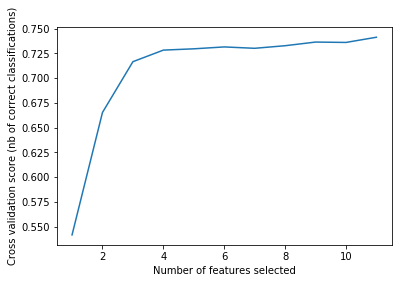

In [79]:
# Plot du nombre de features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [80]:
# On affiche les indicateurs des colonnes conservées
print rfecv.support_, rfecv.ranking_

[ True  True  True  True  True  True  True  True  True  True  True] [1 1 1 1 1 1 1 1 1 1 1]


In [81]:
# On ne garde que les features pertinents 
features_to_consider = []
for ind in range(0, len(features_cols) - 1):
    if rfecv.support_[ind] == True:
        features_to_consider.append(features_cols[ind])
print 'Selected features are %s \n' %(features_to_consider)
print 'Score Recursive Backward Elimination =%f' %(rfecv.score(X_test,y_test))

Selected features are ['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id', 'from_month', 'from_weekday', 'days_before_booking', 'online_booking', 'mobile_site_booking', 'booking_month'] 

Score Recursive Backward Elimination =0.927859


In [82]:
rfecv.grid_scores_

array([ 0.54150646,  0.66528682,  0.71660871,  0.72830809,  0.72961336,
        0.73152539,  0.73013704,  0.73275145,  0.73644144,  0.73606087,
        0.74131262])

In [117]:
# Comparez avec une Feature selection univariée et par SVM

# 1° Avec une sélection univariée, on regarde le top 10% des meilleures features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train_features, y_train_features)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
scores

array([ 0.14034488,  0.04485004,  0.02407969,  0.28344623,  0.76239388,
        0.00677668,  0.06040736,  1.        ,  0.15313679,  0.7251907 ,
        0.07970051])

\\\ Ne pas exécuter le prochain chunk, qui met ~10 minutes à s'exécuter ///

In [115]:
# 2° Avec un SVM linéaire

clf = svm.SVC(kernel='linear')
clf.fit(X_train_features, y_train_features)
print ("Score SVM =%f" %(clf.score(X_test,y_test)))

Score SVM =0.925940


On observe une légère supériorité de la méthode recursive backward elimination sur le SVM.
Comparons maintenant la recursive backward elimination à la sélection univariée. On reprend la méthode de début de TP.

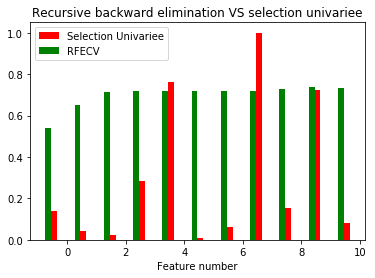

In [118]:
plt.figure(1)
plt.clf()
X_indices = np.arange(X_train_features.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Selection Univariee', color='r')
plt.bar(X_indices - .65, rfecv.grid_scores_, width=.2,
        label=r'RFECV', color='g')

plt.title("Recursive backward elimination VS selection univariee")
plt.xlabel('Feature number')
#plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

Le constat est sans appel, la sélection univariée opère une discrimination bien plus efficace que la recursive backward elimination. Les 3 meilleures features (et donc conservée) par la sélection univariée sont les 5, 8 et 10.


# Apprentissage du modèle

In [119]:
# ON apprend maintenant le modèle sur le train qui n'a pas servi à la sélection de features

Xt = X_train_rest[features_cols]
yt = y_train_rest

In [120]:
# On va apprendre en CV sur ce qui n'a pas été utilisé pour la sélection de features en conservant
# une partie distincte pour le test

from sklearn.cross_validation import train_test_split

Xtr, Xv, ytr, yv = train_test_split(Xt, yt, test_size=0.3)

In [121]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=13., penalty='l1', class_weight='balanced')

In [122]:
from sklearn.cross_validation import cross_val_score
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores = cross_val_score(logreg, Xtr, ytr, scoring='roc_auc', cv=sss)

In [123]:
print 'cross validation scores are %s ' %(cv_scores)

cross validation scores are [ 0.73636975  0.75586114  0.7448424   0.766165    0.75349881] 


In [124]:
print 'Mean cross validation score %s ' %(cv_scores.mean())

Mean cross validation score 0.751347419188 


In [125]:
print 'Standard deviation in cv scores %s ' %(cv_scores.std())

Standard deviation in cv scores 0.0101114670333 


 Que pensez vous de ces résultats ?
 
 Les scores ne sont pas bons (plus d'1 assignation fausse sur 4) il faut probablement changer des hyperparamètres de nos modèles.

# Validation

[Validation_curve](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.validation_curve.html#sklearn.learning_curve.validation_curve)  permet d'étudier plus spécifiquement le comportment du modèle en faisant varier un paramètre   


In [137]:
from sklearn.learning_curve import validation_curve


In [138]:
C = np.linspace(0.1, 50, 5)
val_train, val_test = validation_curve(LogisticRegression(penalty='l1', class_weight='balanced'),
                                       Xtr, ytr, 'C', C, cv=5, scoring='roc_auc')

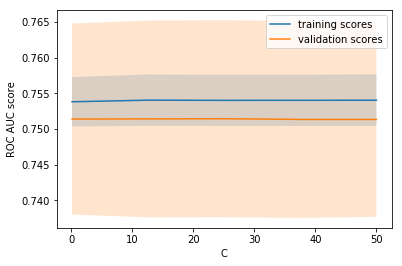

In [139]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(C, val_train, label='training scores')
plot_with_err(C, val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('ROC AUC score')
plt.legend();

[learning_curve](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve.learning_curve) permet de calculer les scores en train et validation pour des bases d'apprentissage de tailles croissantes.
                 

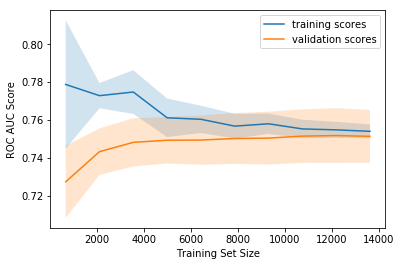

In [136]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(C=13):
    train_sizes = np.linspace(0.05, 1, 10)
    N_train, val_train, val_test = learning_curve(LogisticRegression(C=C, penalty='l2', class_weight='balanced'),
                                                  Xtr, ytr, train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('ROC AUC Score')
    plt.legend()
    
    
plot_learning_curve()

# Perf on test set

In [132]:
# On a maintenant déterminé les paramètres du modèle que nous souhaitons
# On le test sur ce que l'on a conservé comme test set 

clf2 = LogisticRegression(C=13, penalty='l2', class_weight='balanced')
clf2.fit(Xv, yv)
print 'Score avec le reste du test set : %f' %clf2.score(Xv,yv)


Score avec le reste du test set : 0.671190


# Réapprentissage du modèle sur toutes les données 

In [161]:
# On a maintenant déterminé les paramètres du modèle que nous souhaitons
# On l'apprend sur TOUT le training set
clf2.fit(X_train, y_train)
print "Score avec tout le training set : %f" %clf2.score(X_test,y_test)

Score avec tout le training set : 0.674827


In [164]:
final_features = features[features_cols]
logreg.fit(final_features, y)

LogisticRegression(C=13.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Soumission sur le test set

In [165]:
cars_cancel_test = pd.read_csv('./Datas/Kaggle_YourCabs_score.csv', index_col='id')
cars_cancel_test.head()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Unnamed: 18,Unnamed: 19
id,,,,,,,,,,,,,,,,,,,
132516,22179,12,NaN,2,1096.0,393.0,NaN,NaN,1/1/2013 9:30,NaN,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688,NaN,NaN
132529,22187,65,NaN,2,1061.0,393.0,NaN,NaN,1/2/2013 1:00,NaN,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688,NaN,NaN
132532,23180,12,NaN,2,1192.0,353.0,NaN,NaN,1/2/2013 4:30,NaN,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914,NaN,NaN
132547,30849,12,NaN,2,515.0,849.0,NaN,NaN,1/1/2013 20:15,NaN,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072,NaN,NaN
132548,22198,12,NaN,2,83.0,463.0,NaN,NaN,1/3/2013 0:30,NaN,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132,NaN,NaN


In [166]:
cars_cancel_test['from_date'] = pd.to_datetime(cars_cancel_test['from_date'])
cars_cancel_test['to_date'] = pd.to_datetime(cars_cancel_test['to_date'])
cars_cancel_test['booking_created'] = pd.to_datetime(cars_cancel_test['booking_created'])

In [167]:
cars_cancel_test.loc[:, 'difference'] = cars_cancel_test.loc[:, ('from_date')] - cars_cancel_test.loc[:, ('booking_created')]


In [168]:
cars_cancel_test.loc[:, 'from_month'] = cars_cancel_test.from_date.dt.month
cars_cancel_test.loc[:, 'from_weekday'] = cars_cancel_test.from_date.dt.weekday

cars_cancel_test.loc[:, 'booking_month'] = cars_cancel_test.booking_created.dt.month
cars_cancel_test.loc[:, 'booking_weekday'] = cars_cancel_test.booking_created.dt.weekday

In [169]:
cars_cancel_test.loc[:, 'days_before_booking'] = cars_cancel_test.difference.map(convert_to_days)

In [170]:
features_test = cars_cancel_test[features_cols]

In [171]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 132516 to 185942
Data columns (total 11 columns):
vehicle_model_id       10000 non-null int64
travel_type_id         10000 non-null int64
from_area_id           9980 non-null float64
to_area_id             7850 non-null float64
from_month             10000 non-null int64
from_weekday           10000 non-null int64
days_before_booking    10000 non-null float64
online_booking         10000 non-null int64
mobile_site_booking    10000 non-null int64
booking_month          10000 non-null int64
booking_weekday        10000 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1.2 MB


In [174]:
features_test.from_area_id.fillna(-9999, inplace=True)
features_test.to_area_id.fillna(-9999, inplace=True)

In [175]:
preds_logreg = logreg.predict(features_test)


In [176]:
preds_threshold = [1 if pred > 0.50 else 0 for pred in preds_logreg]

In [177]:
submission = pd.DataFrame({'id': features_test.index.values, 'Car_Cancellation': preds_threshold})

Créez le dossier Sousmissions ou modifiez la destination

In [179]:
submission.to_csv('./Soumissions/LogReg_threshold.csv', index=False)